# GazeClusterML

### Authored by: Taimur Khan, Benjamin Nava Höer
***Final Project for TU Berlin WU'20 course: Machine Learning using Python: Theory and Application**

___**Licensed under:**___

### 1. Introduction

### 2. Background

### 3. Theoretical Rationalization

### 4. Implementation

**4.0. Setup Environment**

**4.1. Load and explore data**

In [2]:
# load data from the rest api
import json
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = urllib.request.urlopen("http://dschr.de/api/resultCombineData")
data = json.loads(url.read().decode())
ts1 = pd.DataFrame(data[0]["data"]) # time series 1
ts2 = pd.DataFrame(data[1]["data"]) # time series 2

# setting timestamp to start by 0
ts1['timestamp'] = ts1['timestamp'].apply(lambda x: x - ts1['timestamp'][0]) 
ts2['timestamp'] = ts2['timestamp'].apply(lambda x: x - ts2['timestamp'][0])

print(ts1)
print(ts2)

     timestamp            x           y     label
0            0   986.288075  508.004755  Fixation
1           73  1005.492167  495.522600  Fixation
2          134   942.353008  492.123891  Fixation
3          185   948.193646  474.714589  Fixation
4          235   938.728917  481.875697  Fixation
..         ...          ...         ...       ...
968      60338   904.812802  246.252619   Saccade
969      60397   861.176955  262.574859  Fixation
970      60447   732.960155  276.037371  Fixation
971      60531   635.075056  295.309572   Saccade
972      60581   618.075163  313.958367  Fixation

[973 rows x 4 columns]
      timestamp            x           y     label
0             0   805.724813  598.797895  Fixation
1            60   830.150531  575.433364  Fixation
2           145   853.116613  571.833358  Fixation
3           196   840.831675  574.131049  Fixation
4           246   841.620069  571.197856   Saccade
...         ...          ...         ...       ...
1098      68922   9

**4.2. Preprocess data**

In [8]:
session_arrays = []
for i in range(16):
    current_df = pd.DataFrame(data[i]["data"])
    current_df['timestamp'] = current_df['timestamp'].apply(lambda x: x - current_df['timestamp'][0])
    session_arrays.append(current_df.to_numpy())
for i in session_arrays:
    print(i.shape)

(973, 4)
(1103, 4)
(1551, 4)
(822, 4)
(1927, 4)
(833, 4)
(1315, 4)
(845, 4)
(1251, 4)
(686, 4)
(717, 4)
(869, 4)
(1504, 4)
(1660, 4)
(733, 4)
(1166, 4)


**4.3. Choose and implement model**

In [10]:
from sklearn.cluster import DBSCAN
eps = [0.1, 1, 10]
min_samples = [1, 3, 5, 7, 9]
X = session_arrays[0][:,1:3]

for i in eps:
    for j in min_samples:
        clf_dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
        y_pred = clf_dbscan.fit_predict(X)
        

TypeError: '>' not supported between instances of 'list' and 'float'

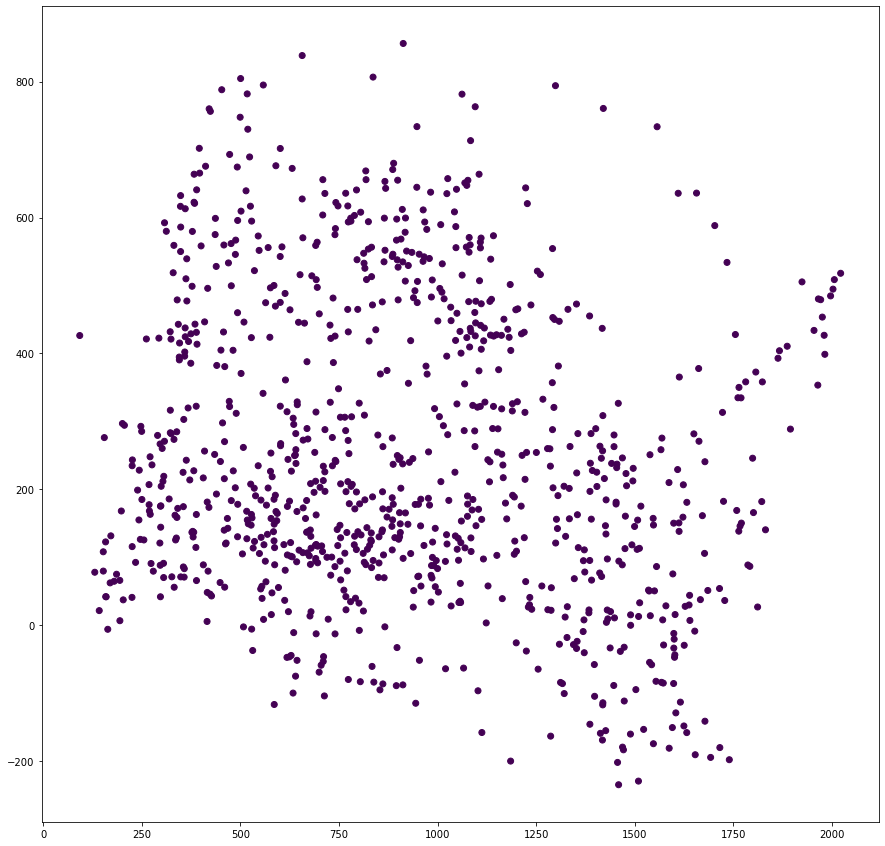

In [11]:
from sklearn.cluster import DBSCAN
eps = [0.1, 1, 10]
min_samples = [1, 3, 5, 7, 9]
X = session_arrays[0][:,1:3]        
clf_dbscan = DBSCAN(eps=15, min_samples=5, metric='braycurtis', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
y_pred = clf_dbscan.fit_predict(X)

fig = plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1], c=y_pred)

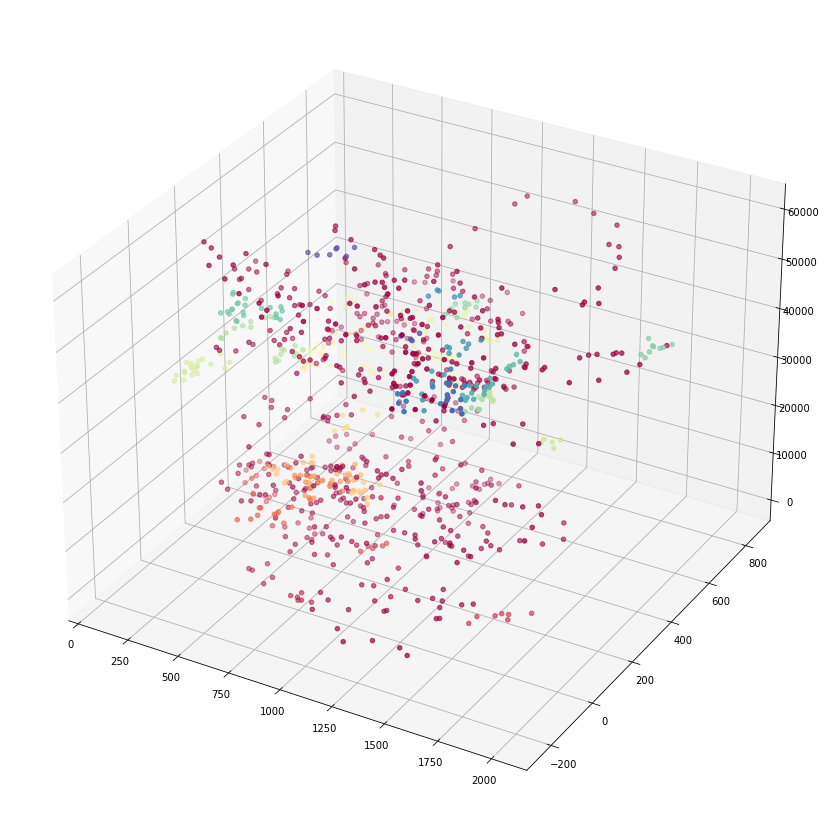

In [16]:
clf_dbscan = DBSCAN(eps=150, min_samples=5, metric='euclidean', algorithm='auto', leaf_size=30, p=2, n_jobs=1)
X = session_arrays[0][:,0:3]
y_pred = clf_dbscan.fit_predict(X)

#plt.scatter3D(X[:,1],X[:,2],X[:,0], c=y_pred)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],X[:,0], c=y_pred, cmap=plt.cm.Spectral)

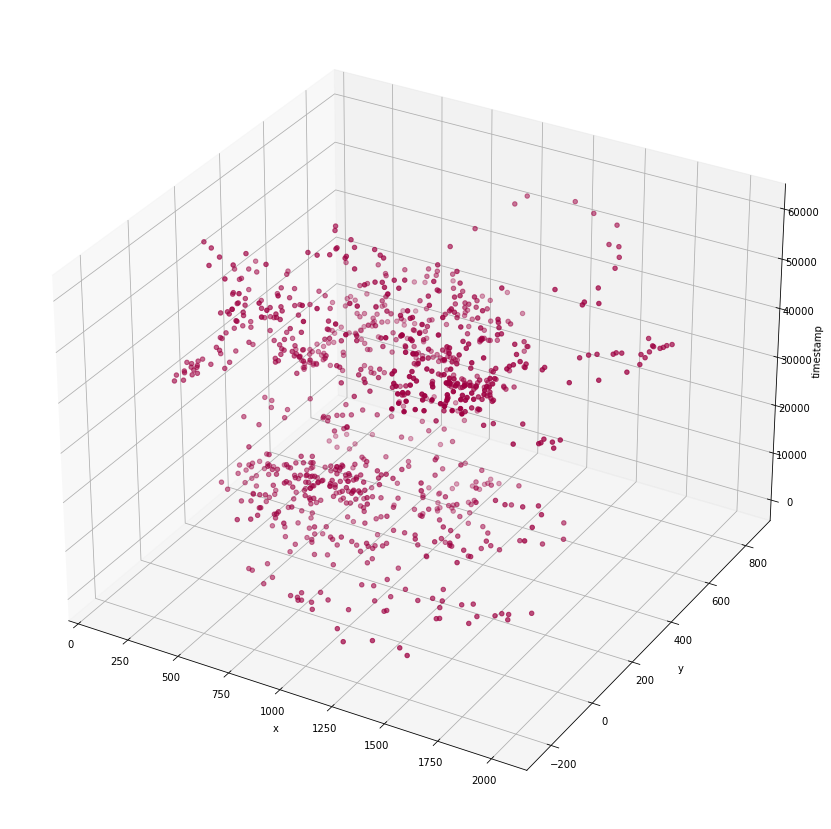

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

filter3d = plt.figure(figsize=(15,15)).gca(projection='3d')

filter3d.scatter(X[:,1],X[:,2],X[:,0], c=y_pred, cmap=plt.cm.Spectral)
filter3d.set_xlabel('x')
filter3d.set_ylabel('y')
filter3d.set_zlabel('timestamp')

plt.show()

In [19]:
for i in range(y_pred.size):
    if y_pred[i] >= 0:
        y_pred[i] = 1
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

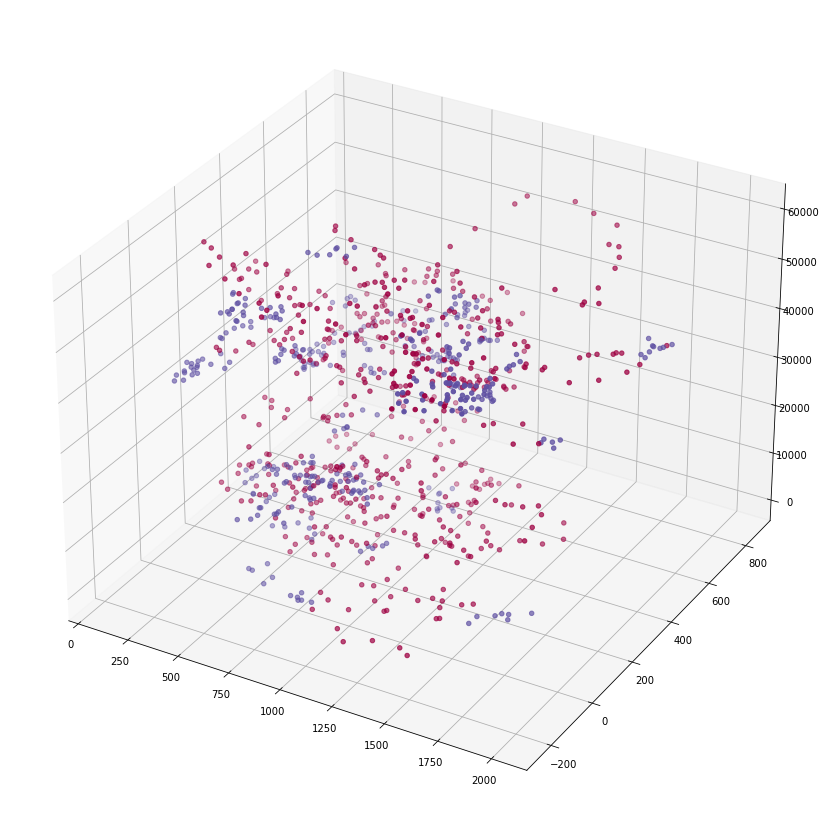

In [20]:
#plt.scatter3D(X[:,1],X[:,2],X[:,0], c=y_pred)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],X[:,0], c=y_pred, cmap=plt.cm.Spectral)

**4.4. Train model**

**4.5. Evaluate model**

### 5. Conclusions 

### 6. References